# Coin Flip #

In [45]:
%matplotlib inline

In [78]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

In [79]:
def coin_flip(heads_count, tails_count):
    flip = random.choice(['Heads', 'Tails'])
    if flip == 'Heads':
        return True
    elif flip == 'Tails':
        return False
    

In [80]:
def multiple_coin_flips(num_of_flips=2**16):
    interval_capture = 0
    current_flip_num = 0
    heads_count = 0
    tails_count = 0
    heads_results = []
    tails_results = []
    while current_flip_num < num_of_flips:
        flip = coin_flip(heads_count, tails_count)
        if flip == True :
            heads_count += 1
        else:
            tails_count += 1
        current_flip_num += 1
        if current_flip_num == num_of_flips:
            heads_results.append(heads_count)
            tails_results.append(tails_count)
        elif current_flip_num == (2 ** interval_capture):
            heads_results.append(heads_count)
            tails_results.append(tails_count)
            interval_capture +=1    
    return heads_results, tails_results    

In [81]:
heads_results, tails_results = multiple_coin_flips()

In [82]:
def find_ratios(heads_results, tails_results):
    ratios = []
    for a, b in zip(heads_results, tails_results):
        try: 
            ratios.append(a/b)
        except: 
            ratios.append(0)
    return ratios

In [83]:
results = [a + b for a, b in zip(heads_results, tails_results)]

In [84]:
difference = [a - b for a, b in zip(heads_results, tails_results)]

In [85]:
print(difference)

[-1, 0, 0, 0, -2, 2, 6, -12, -14, -14, 2, 20, 50, 72, 76, 188, 236]


In [86]:
ratios = find_ratios(heads_results, tails_results)

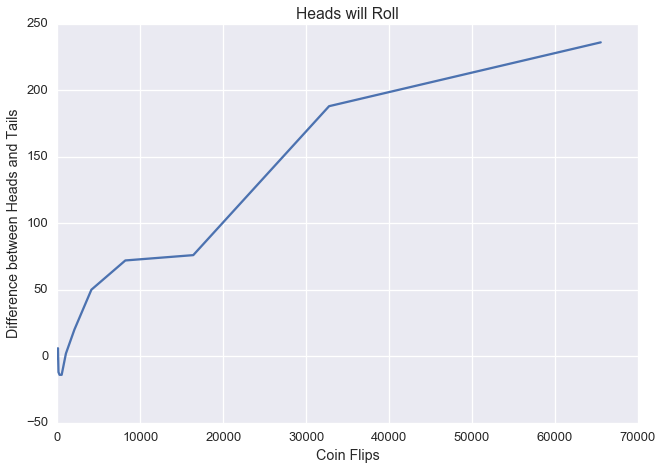

In [100]:
y = difference
x = results

sns.set_context("talk")
plt.plot(x, y)

plt.xlabel('# Coin Flips')
plt.ylabel('Difference between Heads and Tails')
plt.title('Heads will Roll')

plt.show()

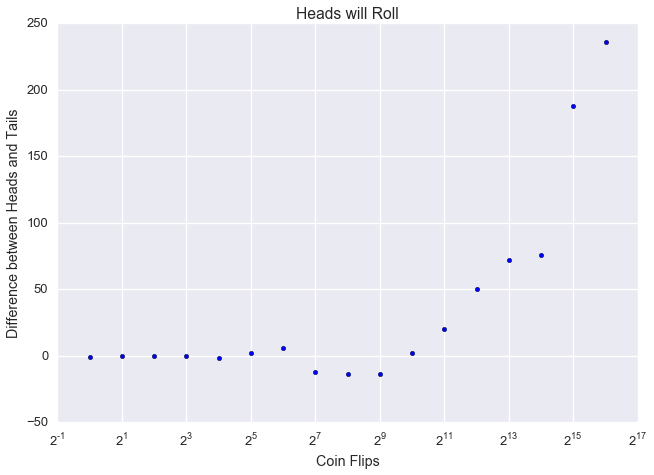

In [101]:
y = difference
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)

plt.xlabel('# of Coin Flips')
plt.ylabel('Difference between Heads and Tails')
plt.title('Heads will Roll')

plt.show()

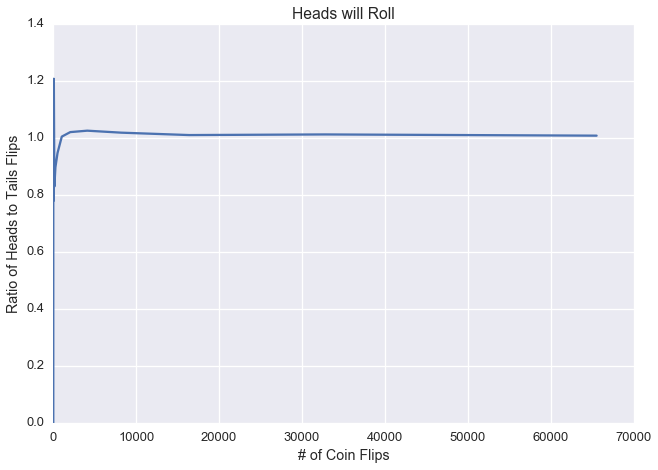

In [102]:
y = ratios
x = results

sns.set_context("talk")
plt.plot(x, y)

plt.xlabel('# of Coin Flips')
plt.ylabel('Ratio of Heads to Tails Flips')
plt.title('Heads will Roll')

plt.show()

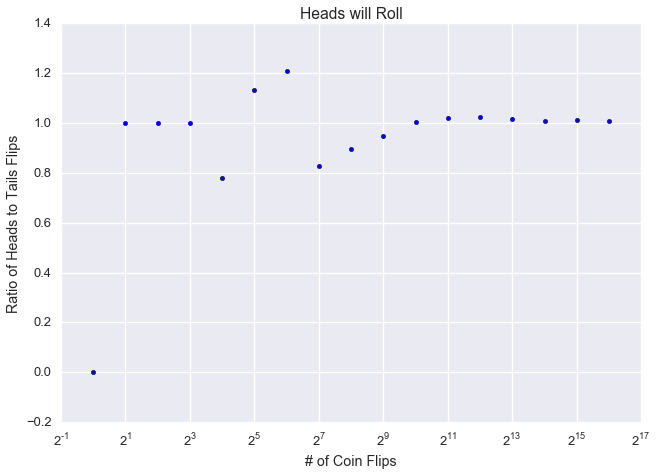

In [103]:
y = ratios
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.xlabel('# of Coin Flips')
plt.ylabel('Ratio of Heads to Tails Flips')
plt.title('Heads will Roll')
plt.show()

### Using logarithmic scale makes it much clearer to see what is going on each interval.  Without the logarithmic scale, a majority of the chart is just showing the largest interval ###

In [91]:
def twenty_times_multiple_coin_tosses():
    master_ratios_list = []
    master_count = 0
    while master_count < 20:
        heads_results, tails_results = multiple_coin_flips()
        ratios_temp = find_ratios(heads_results, tails_results)
        master_ratios_list.append(ratios_temp)
        master_count += 1
    return master_ratios_list 

In [92]:
master_ratios_list = twenty_times_multiple_coin_tosses()

In [93]:
#total_list =[item for sublist in master_ratios_list for item in sublist]

In [94]:
zipped = zip(*master_ratios_list)
            
    

In [95]:
mean_list = []
for item in zipped:
    mean_list.append(st.mean(item))

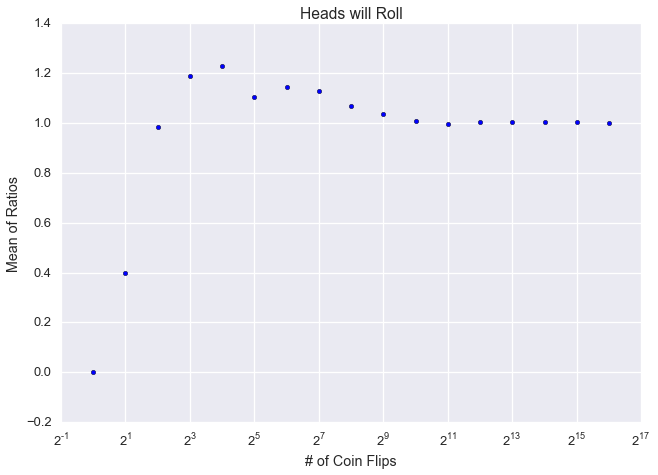

In [104]:
y = mean_list
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.xlabel('# of Coin Flips')
plt.ylabel('Mean of Ratios')
plt.title('Heads will Roll')
plt.show()

In [97]:
zipped = zip(*master_ratios_list)
            

In [98]:
std_dev_list = []
for item in zipped:
    std_dev_list.append(st.stdev(item))

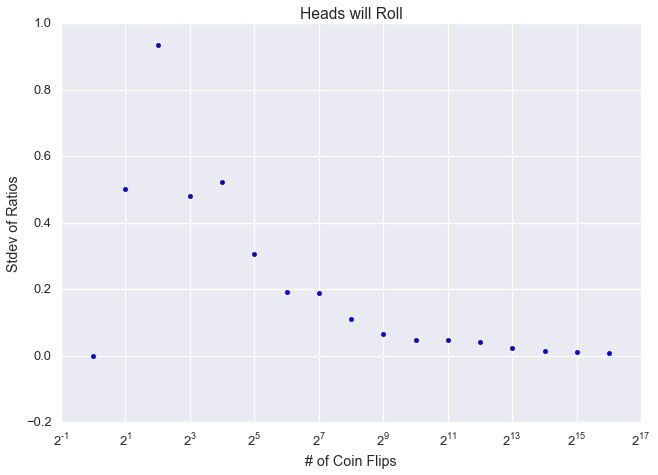

In [105]:
y = std_dev_list
x = results

sns.set_context("talk")
plt.scatter(x, y)
plt.xscale('log', basex=2)
plt.xlabel('# of Coin Flips')
plt.ylabel('Stdev of Ratios')
plt.title('Heads will Roll')
plt.show()

### Mean of ratios seems to be inverse of std. dev ###

In [68]:
def multiple_coin_flips(num_of_flips):
    current_flip_num = 0
    heads_count = 0
    while current_flip_num < num_of_flips:
        flip = random.choice(['Heads', 'Tails'])
        if flip == 'Heads':
            heads_count += 1
        current_flip_num += 1
    return heads_count/current_flip_num

In [24]:
def histogram_data_grab(num_of_sims, num_of_flips_per_sim):
    list_of_head_to_flips_ratios = []
    count_of_sims = 0
    while count_of_sims < num_of_sims:
        head_to_flips_ratio = multiple_coin_flips(num_of_flips_per_sim)
        list_of_head_to_flips_ratios.append(head_to_flips_ratio)
        count_of_sims += 1
    return list_of_head_to_flips_ratios
        

In [25]:
nums = histogram_data_grab(100000, 100)

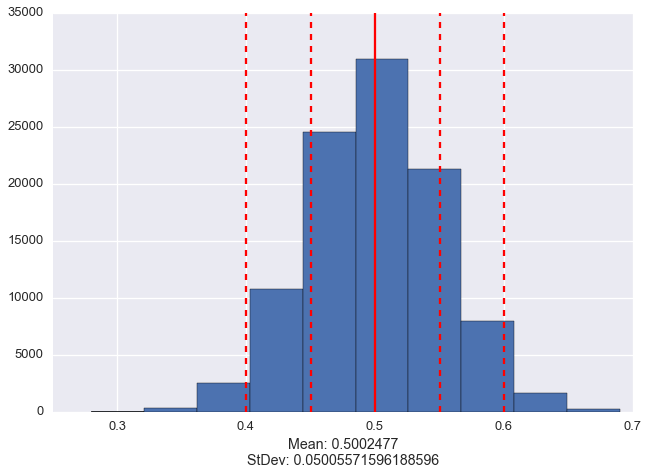

In [109]:
plt.hist(nums)
mean = st.mean(nums)
stdev = st.stdev(nums)
ymin, ymax = plt.ylim()


plt.xlabel('Mean: {}'.format(mean) + '\nStDev: {}'.format(stdev))
sns.set_context("talk")
plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

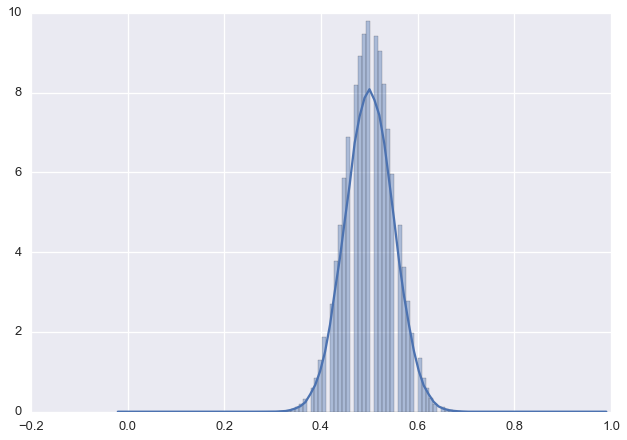

In [27]:
sns.distplot(nums);

In [28]:
nums_two = histogram_data_grab(100000, 1000)

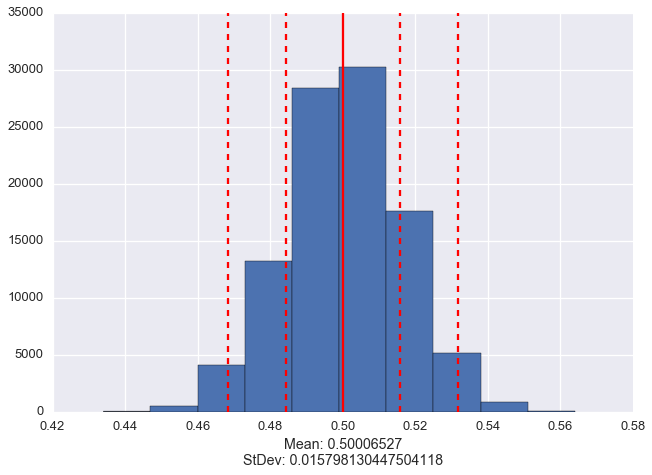

In [110]:
plt.hist(nums_two)
mean = st.mean(nums_two)
stdev = st.stdev(nums_two)
ymin, ymax = plt.ylim()

plt.xlabel('Mean: {}'.format(mean) + '\nStDev: {}'.format(stdev))
sns.set_context("talk")
plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

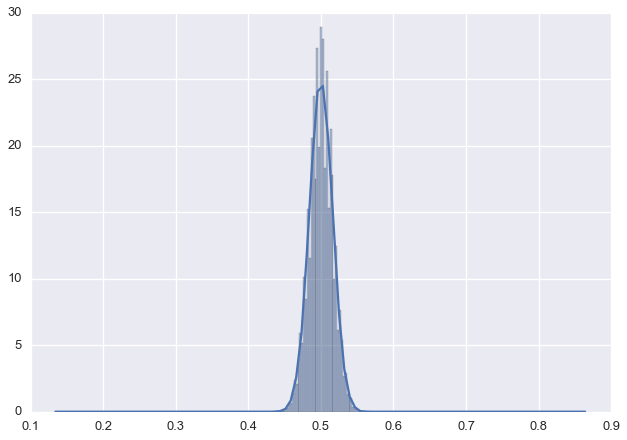

In [30]:
sns.distplot(nums_two);

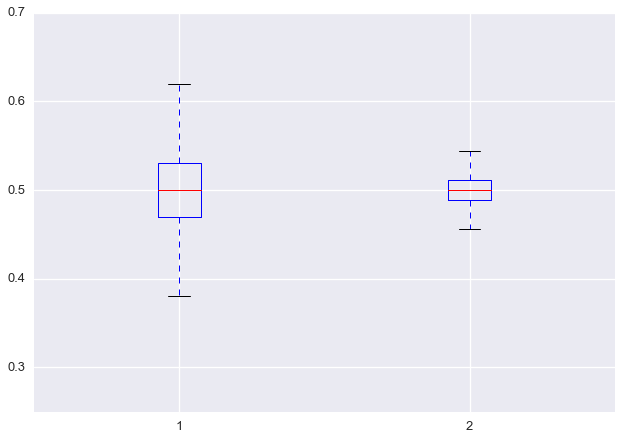

In [31]:
sns.set_context("talk")
plt.boxplot([nums, nums_two])
plt.show()

### running 1000 coin flips instead of 100 gives us much smaller std. devs ###